In [13]:
import pandas as pd

# Leer el archivo csv original
df = pd.read_csv('movies_dataset.csv', low_memory=False)

# Seleccionar la columna 'belongs_to_collection'
df_belongs_to_collection = df[['belongs_to_collection']]

# Reemplazar las comillas simples por dobles en la columna 'belongs_to_collection'
df_belongs_to_collection['belongs_to_collection'] = df_belongs_to_collection['belongs_to_collection'].apply(
    lambda x: x.replace("'", '"') if isinstance(x, str) else x)
# Eliminar filas vacías en la columna 'belongs_to_collection'
df_belongs_to_collection = df_belongs_to_collection.dropna()

# Eliminar filas con valores float en la columna 'belongs_to_collection'
df_belongs_to_collection = df_belongs_to_collection[~df_belongs_to_collection.applymap(
    lambda x: isinstance(x, float)).any(axis=1)]

# Guardar el resultado en un nuevo archivo csv
df_belongs_to_collection.to_csv(
    'movies_unacolumna.csv', index=False)


C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\190150211.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_belongs_to_collection['belongs_to_collection'] = df_belongs_to_collection['belongs_to_collection'].apply(


In [14]:
import pandas as pd

# cargar el archivo csv
df = pd.read_csv('movies_unacolumna.csv')

# eliminar la fila que contenga la cadena exacta
df = df.drop(df[df['belongs_to_collection'] ==
             '{"id": 10455, "name": "Child\'s Play Collection", "poster_path": "/50aqbDvbOtdlZrje6Qk4ZvKM7dM.jpg", "backdrop_path": "/AAhYXBVIEl6WgQnzfBsauTIC25.jpg"}'].index)

# guardar el resultado en un nuevo archivo csv
df.to_csv('movies_unacolumna.csv', index=False)


In [15]:
import pandas as pd
import ast

# leer el archivo CSV original
df = pd.read_csv('movies_dataset.csv')

# eliminar la columna "id" de "belongs_to_collection"
df_belongs_to_collection = df[df['belongs_to_collection'].notnull()]
df_belongs_to_collection['belongs_to_collection'] = df_belongs_to_collection['belongs_to_collection'].apply(
    lambda x: x.replace("'s", "'"))
df_belongs_to_collection['belongs_to_collection'] = df_belongs_to_collection['belongs_to_collection'].apply(
    lambda x: ast.literal_eval(x))
df_belongs_to_collection['belongs_to_collection'] = df_belongs_to_collection['belongs_to_collection'].apply(
    lambda x: {k: v for k, v in x.items() if k != 'id'} if x is not None else None)

# eliminar la fila con el diccionario específico
dict_to_remove = {"id": 10455, "name": "Child's Play Collection",
                  "poster_path": "/50aqbDvbOtdlZrje6Qk4ZvKM7dM.jpg", "backdrop_path": "/AAhYXBVIEl6WgQnzfBsauTIC25.jpg"}
df_belongs_to_collection = df_belongs_to_collection[
    df_belongs_to_collection['belongs_to_collection'] != dict_to_remove]

# guardar el resultado en un nuevo archivo CSV
df_belongs_to_collection.to_csv('movies_unacolumna.csv', index=False)


C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\3928047880.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_dataset.csv')
C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\3928047880.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_belongs_to_collection['belongs_to_collection'] = df_belongs_to_collection['belongs_to_collection'].apply(
C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\3928047880.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [16]:
import ast
import pandas as pd

# Cargamos el archivo CSV original
df = pd.read_csv('movies_dataset.csv')


# Creamos nuevas columnas para cada clave
for i, row in df.iterrows():
    belongs_to_collection = row['belongs_to_collection']
    if isinstance(belongs_to_collection, str):  # comprobamos si es una cadena
        try:
            dict_data = ast.literal_eval(belongs_to_collection)
            if isinstance(dict_data, dict):  # comprobamos si es un diccionario
                df.loc[i, 'collection_id'] = dict_data.get('id', None)
                df.loc[i, 'collection_name'] = dict_data.get('name', None)
                df.loc[i, 'collection_poster_path'] = dict_data.get(
                    'poster_path', None)
        except (ValueError, SyntaxError):  # ignoramos si no se puede evaluar como un diccionario
            pass

# Mostramos el resultado
print(df)

df.to_csv('movies_unalistadediccionarios.csv', index=False)


C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\1182097942.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_dataset.csv')


       adult                              belongs_to_collection     budget  \
0      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   11000000   
1      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   18000000   
2      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   32350000   
3      False  {'id': 10, 'name': 'Star Wars Collection', 'po...  115000000   
4      False  {'id': 10, 'name': 'Star Wars Collection', 'po...  120000000   
...      ...                                                ...        ...   
45458  False                                                NaN          0   
45459  False                                                NaN          0   
45460  False                                                NaN          0   
45461  False                                                NaN          0   
45462  False                                                NaN          0   

                                                  genres  \
0  

In [17]:
import ast
import pandas as pd

df = pd.read_csv('movies_unalistadediccionarios.csv')

# Agregar nuevas columnas para las claves que nos interesan
df['genre_name'] = ''
df['genre_id'] = ''

# Iterar sobre la lista de diccionarios
for i, row in df.iterrows():
    my_list = row['genres']
    if isinstance(my_list, str):  # comprobamos si es una cadena
        try:
            list_data = ast.literal_eval(my_list)
            if isinstance(list_data, list):  # comprobamos si es una lista
                for dict_data in list_data:
                    if isinstance(dict_data, dict):  # comprobamos si es un diccionario
                        # Agregar los valores para las claves que nos interesan
                        if 'name' in dict_data:
                            df.at[i, 'genre_name'] = dict_data['name']
                        if 'id' in dict_data:
                            df.at[i, 'genre_id'] = dict_data['id']
        # ignoramos si no se puede evaluar como una lista de diccionarios
        except (ValueError, SyntaxError):
            pass

# Mostramos el resultado
print(df)

# Guardamos el resultado en un nuevo archivo CSV
df.to_csv('movies_unalistadediccionarios.csv', index=False)


C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\3435932701.py:4: DtypeWarning: Columns (1,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_unalistadediccionarios.csv')


       adult                              belongs_to_collection     budget  \
0      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   11000000   
1      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   18000000   
2      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   32350000   
3      False  {'id': 10, 'name': 'Star Wars Collection', 'po...  115000000   
4      False  {'id': 10, 'name': 'Star Wars Collection', 'po...  120000000   
...      ...                                                ...        ...   
45458  False                                                NaN          0   
45459  False                                                NaN          0   
45460  False                                                NaN          0   
45461  False                                                NaN          0   
45462  False                                                NaN          0   

                                                  genres  \
0  

In [17]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import joblib

from fastapi import FastAPI

app = FastAPI()

# Cargar dataset
movies = pd.read_csv('movies_dataset_final1.csv')

# Seleccionar solo las columnas necesarias
movies_subset = movies[['original_language', 'title', 'genre_name']]

# Eliminar filas con valores nulos
movies_subset = movies_subset.dropna()

# Limitar a 18000 filas
movies_subset = movies_subset.head(18000)

# Convertir valores categóricos en variables dummies
movies_subset = pd.get_dummies(movies_subset, columns=[
                               'original_language', 'title', 'genre_name'])

# Entrenar modelo de vecinos cercanos
model = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')
model.fit(movies_subset)

# Normalizar los datos
scaler = StandardScaler()
movies_norm = scaler.fit_transform(movies_subset)

# Guardar modelo y scaler entrenados
joblib.dump(model, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Función de recomendación


@app.get("/recomendacion", tags=["Recomendación de películas"])
async def recomendacion(titulo: str):
    # Cargar modelo y scaler entrenados
    model = joblib.load('model.joblib')
    scaler = joblib.load('scaler.joblib')

    # Crear vector de características del título proporcionado
    title_features = pd.get_dummies(pd.DataFrame(
        {'title': [titulo], 'original_language': ['en']}))
    title_features = title_features.reindex(
        columns=movies_subset.columns, fill_value=0)
    title_features = scaler.transform(title_features)

    # Obtener índices de las películas similares
    distances, indices = model.kneighbors(title_features, n_neighbors=6)

    # Obtener los títulos de las películas similares
    titles = []
    for i in range(1, len(distances.flatten())):
        titles.append(
            movies[movies.index == indices.flatten()[i]]['title'].values[0])

    return {'lista recomendada': titles}


C:\Users\Yamil\AppData\Local\Temp\ipykernel_15484\2881902932.py:11: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_dataset_final1.csv')


In [18]:
import ast
import pandas as pd

df = pd.read_csv('movies_unalistadediccionarios.csv')

# Agregar nuevas columnas para las claves que nos interesan
df['production_companies_name'] = ''
df['production_companies_id'] = ''

# Iterar sobre la lista de diccionarios
for i, row in df.iterrows():
    my_list = row['production_companies']
    if isinstance(my_list, str):  # comprobamos si es una cadena
        try:
            list_data = ast.literal_eval(my_list)
            if isinstance(list_data, list):  # comprobamos si es una lista
                for dict_data in list_data:
                    if isinstance(dict_data, dict):  # comprobamos si es un diccionario
                        # Agregar los valores para las claves que nos interesan
                        if 'name' in dict_data:
                            df.at[i, 'production_companies_name'] = dict_data['name']
                        if 'id' in dict_data:
                            df.at[i, 'production_companies_id'] = dict_data['id']
        # ignoramos si no se puede evaluar como una lista de diccionarios
        except (ValueError, SyntaxError):
            pass

# Mostramos el resultado
print(df)

# Guardamos el resultado en un nuevo archivo CSV
df.to_csv('movies_unalistadediccionarios.csv', index=False)


C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\3659663152.py:4: DtypeWarning: Columns (1,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_unalistadediccionarios.csv')


       adult                              belongs_to_collection     budget  \
0      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   11000000   
1      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   18000000   
2      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   32350000   
3      False  {'id': 10, 'name': 'Star Wars Collection', 'po...  115000000   
4      False  {'id': 10, 'name': 'Star Wars Collection', 'po...  120000000   
...      ...                                                ...        ...   
45458  False                                                NaN          0   
45459  False                                                NaN          0   
45460  False                                                NaN          0   
45461  False                                                NaN          0   
45462  False                                                NaN          0   

                                                  genres  \
0  

In [19]:
import ast
import pandas as pd

df = pd.read_csv('movies_unalistadediccionarios.csv')

# Agregar nuevas columnas para las claves que nos interesan
df['production_countries_name'] = ''
df['production_countries_id'] = ''

# Iterar sobre la lista de diccionarios
for i, row in df.iterrows():
    my_list = row['production_countries']
    if isinstance(my_list, str):  # comprobamos si es una cadena
        try:
            list_data = ast.literal_eval(my_list)
            if isinstance(list_data, list):  # comprobamos si es una lista
                for dict_data in list_data:
                    if isinstance(dict_data, dict):  # comprobamos si es un diccionario
                        # Agregar los valores para las claves que nos interesan
                        if 'name' in dict_data:
                            df.at[i, 'production_countries_name'] = dict_data['name']
                        if 'id' in dict_data:
                            df.at[i, 'production_countries_id'] = dict_data['id']
        # ignoramos si no se puede evaluar como una lista de diccionarios
        except (ValueError, SyntaxError):
            pass

# Mostramos el resultado
print(df)

# Guardamos el resultado en un nuevo archivo CSV
df.to_csv('movies_unalistadediccionarios.csv', index=False)


C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\3204749322.py:4: DtypeWarning: Columns (1,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_unalistadediccionarios.csv')


       adult                              belongs_to_collection     budget  \
0      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   11000000   
1      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   18000000   
2      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   32350000   
3      False  {'id': 10, 'name': 'Star Wars Collection', 'po...  115000000   
4      False  {'id': 10, 'name': 'Star Wars Collection', 'po...  120000000   
...      ...                                                ...        ...   
45458  False                                                NaN          0   
45459  False                                                NaN          0   
45460  False                                                NaN          0   
45461  False                                                NaN          0   
45462  False                                                NaN          0   

                                                  genres  \
0  

In [20]:
import ast
import pandas as pd

df = pd.read_csv('movies_unalistadediccionarios.csv')

# Agregar nuevas columnas para las claves que nos interesan
df['spoken_languages_name'] = ''
df['spoken_languages_iso'] = ''

# Iterar sobre la lista de diccionarios
for i, row in df.iterrows():
    my_list = row['spoken_languages']
    if isinstance(my_list, str):  # comprobamos si es una cadena
        try:
            list_data = ast.literal_eval(my_list)
            if isinstance(list_data, list):  # comprobamos si es una lista
                for dict_data in list_data:
                    if isinstance(dict_data, dict):  # comprobamos si es un diccionario
                        # Agregar los valores para las claves que nos interesan
                        if 'name' in dict_data:
                            df.at[i, 'spoken_languages_name'] = dict_data['name']
                        if 'iso_639_1' in dict_data:
                            df.at[i, 'spoken_languages_iso'] = dict_data['iso_639_1']
        # ignoramos si no se puede evaluar como una lista de diccionarios
        except (ValueError, SyntaxError):
            pass

# Mostramos el resultado
print(df)

# Guardamos el resultado en un nuevo archivo CSV
df.to_csv('movies_unalistadediccionarios.csv', index=False)


C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\2086059675.py:4: DtypeWarning: Columns (1,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_unalistadediccionarios.csv')


       adult                              belongs_to_collection     budget  \
0      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   11000000   
1      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   18000000   
2      False  {'id': 10, 'name': 'Star Wars Collection', 'po...   32350000   
3      False  {'id': 10, 'name': 'Star Wars Collection', 'po...  115000000   
4      False  {'id': 10, 'name': 'Star Wars Collection', 'po...  120000000   
...      ...                                                ...        ...   
45458  False                                                NaN          0   
45459  False                                                NaN          0   
45460  False                                                NaN          0   
45461  False                                                NaN          0   
45462  False                                                NaN          0   

                                                  genres  \
0  

In [21]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('movies_unalistadediccionarios.csv')

# Eliminar columnas
df = df.drop(['belongs_to_collection', 'genres', 'production_companies',
             'production_countries', 'spoken_languages'], axis=1)

# Guardar el resultado en un nuevo archivo CSV
df.to_csv('movies_dataset_final.csv', index=False)


C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\3692565896.py:4: DtypeWarning: Columns (1,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_unalistadediccionarios.csv')


In [22]:
import pandas as pd

# cargar el archivo CSV en un dataframe
df = pd.read_csv('movies_dataset_final.csv')

# rellenar los valores nulos en las columnas revenue y budget con 0
df['revenue'].fillna(0, inplace=True)
df['budget'].fillna(0, inplace=True)

# eliminar las filas con valores nulos en la columna release_date
df.dropna(subset=['release_date'], inplace=True)

# convertir las fechas al formato AAAA-mm-dd y extraer el año a una nueva columna llamada release_year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year.astype('Int64')

# crear la columna return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget
df['return'] = df['revenue'] / df['budget']
df['return'].fillna(0, inplace=True)

# eliminar las columnas que no serán utilizadas
df.drop(columns=['video', 'imdb_id', 'adult', 'original_title',
        'vote_count', 'poster_path', 'homepage'], inplace=True)

# guardar el dataframe actualizado en un nuevo archivo CSV
df.to_csv('movies_dataset_final1.csv', index=False)


C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\629249970.py:4: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_dataset_final.csv')


In [23]:
from fastapi import FastAPI

# Aquí se inicializa la aplicación FastAPI
app = FastAPI()

# Definición de las funciones para los endpoints


@app.get("/peliculas_mes")
async def peliculas_mes(mes: str):
    # Lógica para obtener la cantidad de películas estrenadas en el mes
    # La variable 'respuesta' debe ser reemplazada por la cantidad de películas encontradas
    respuesta = obtener_cantidad_peliculas_mes(mes)
    return {'mes': mes, 'cantidad': respuesta}


@app.get("/peliculas_dia")
async def peliculas_dia(dia: str):
    # Lógica para obtener la cantidad de películas estrenadas en el día de la semana
    # La variable 'respuesta' debe ser reemplazada por la cantidad de películas encontradas
    respuesta = obtener_cantidad_peliculas_dia(dia)
    return {'dia': dia, 'cantidad': respuesta}


@app.get("/franquicia")
async def franquicia(franquicia: str):
    # Lógica para obtener la cantidad de películas, ganancia total y promedio de la franquicia
    # Las variables 'cantidad', 'ganancia_total' y 'ganancia_promedio' deben ser reemplazadas por los valores encontrados
    cantidad, ganancia_total, ganancia_promedio = obtener_datos_franquicia(
        franquicia)
    return {'franquicia': franquicia, 'cantidad': cantidad, 'ganancia_total': ganancia_total, 'ganancia_promedio': ganancia_promedio}


@app.get("/peliculas_pais")
async def peliculas_pais(pais: str):
    # Lógica para obtener la cantidad de películas producidas en el país
    # La variable 'respuesta' debe ser reemplazada por la cantidad de películas encontradas
    respuesta = obtener_cantidad_peliculas_pais(pais)
    return {'pais': pais, 'cantidad': respuesta}


@app.get("/productoras")
async def productoras(productora: str):
    # Lógica para obtener la ganancia total y cantidad de películas producidas por la productora
    # Las variables 'ganancia_total' y 'cantidad' deben ser reemplazadas por los valores encontrados
    ganancia_total, cantidad = obtener_datos_productora(productora)
    return {'productora': productora, 'ganancia_total': ganancia_total, 'cantidad': cantidad}


@app.get("/retorno")
async def retorno(pelicula: str):
    # Lógica para obtener la inversión, ganancia, retorno y año de lanzamiento de la película
    # Las variables 'inversion', 'ganancia', 'retorno' y 'anio' deben ser reemplazadas por los valores encontrados
    inversion, ganancia, retorno, anio = obtener_datos_pelicula(pelicula)
    return {'pelicula': pelicula, 'inversion': inversion, 'ganacia': ganancia, 'retorno': retorno, 'anio': anio}


C:\Users\Yamil\AppData\Local\Temp\ipykernel_3872\2414147174.py:6: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_dataset_final1.csv')
C:\Users\Yamil\AppData\Local\Temp\ipykernel_3872\2414147174.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


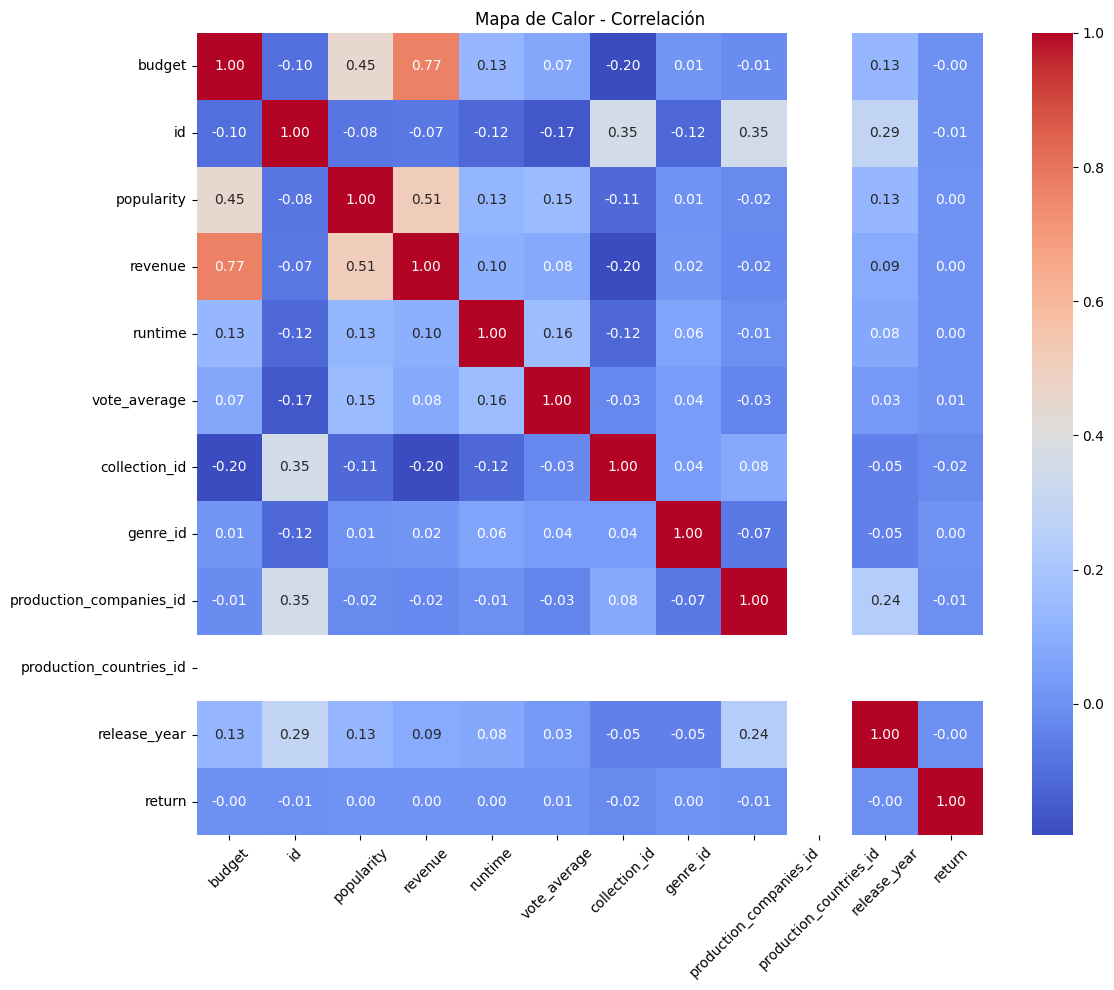

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame con tus datos
df = pd.read_csv('movies_dataset_final1.csv')

# Obtener la matriz de correlación
corr_matrix = df.corr()

# Crear una figura y un eje para el mapa de calor
plt.figure(figsize=(12, 10))
ax = plt.axes()

# Generar el mapa de calor
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

# Personalizar el mapa de calor
ax.set_title('Mapa de Calor - Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el mapa de calor
plt.show()


C:\Users\Yamil\AppData\Local\Temp\ipykernel_11280\1153470927.py:8: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_dataset_final1.csv')


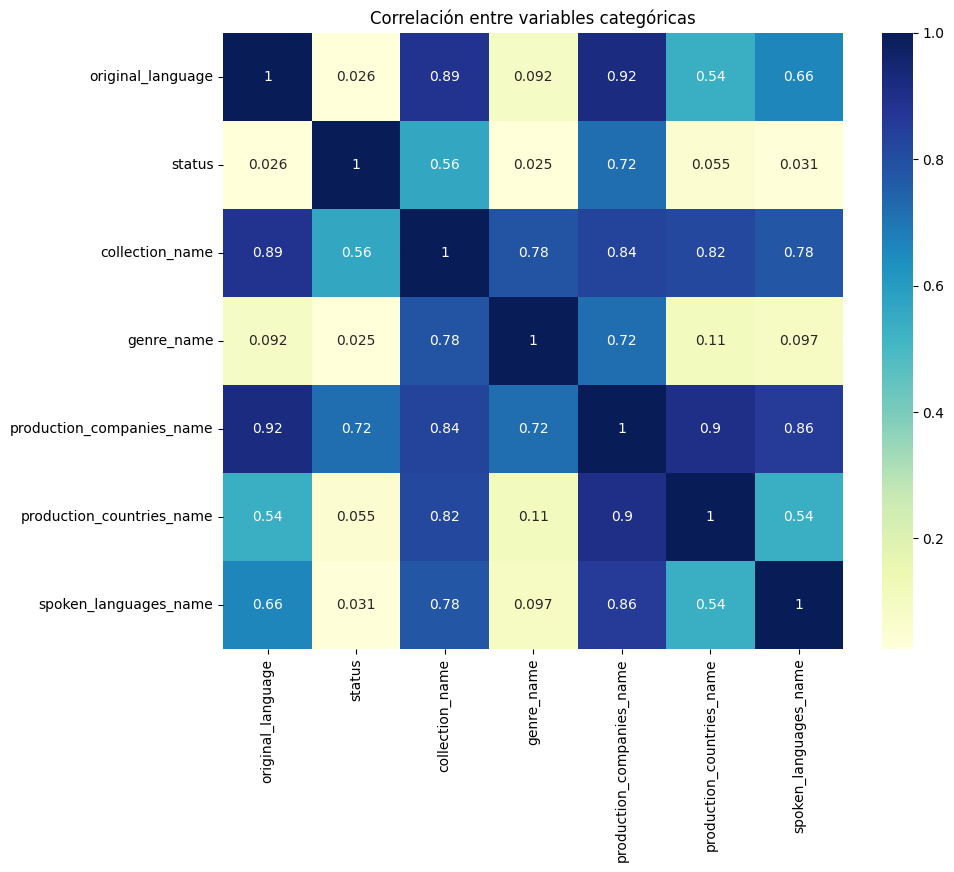

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Cargar los datos
df = pd.read_csv('movies_dataset_final1.csv')

# Seleccionar variables categóricas de interés
categorical_cols = ['original_language', 'status', 'collection_name', 'genre_name',
                    'production_companies_name', 'production_countries_name', 'spoken_languages_name']

# Crear una matriz vacía para almacenar los coeficientes de correlación
corr_matrix_categorical = np.zeros(
    (len(categorical_cols), len(categorical_cols)))

# Calcular el coeficiente de correlación de Cramer's V para cada par de variables
for i in range(len(categorical_cols)):
    for j in range(len(categorical_cols)):
        if i != j:
            contingency_table = pd.crosstab(
                df[categorical_cols[i]], df[categorical_cols[j]])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            corr_matrix_categorical[i, j] = np.sqrt(
                chi2 / (n * min(contingency_table.shape)-1))
        else:
            corr_matrix_categorical[i, j] = 1.0

# Crear un dataframe con la matriz de correlación
corr_df = pd.DataFrame(corr_matrix_categorical,
                       index=categorical_cols, columns=categorical_cols)

# Generar el mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='YlGnBu')
plt.title('Correlación entre variables categóricas')
plt.show()


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Cargar los datos
df = pd.read_csv('movies_dataset_final1.csv')

# Seleccionar variables categóricas de interés
categorical_cols = ['original_language', 'collection_name', 'genre_name',
                    'production_companies_name', 'production_countries_name', 'spoken_languages_name']

# Calcular el coeficiente de correlación de Cramer's V para cada par de variables
for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        contingency_table = pd.crosstab(
            df[categorical_cols[i]], df[categorical_cols[j]])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * min(contingency_table.shape)-1))
        print(
            f"Correlación entre {categorical_cols[i]} y {categorical_cols[j]}: {cramers_v}")


C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\2652379704.py:6: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_dataset_final1.csv')


Correlación entre original_language y collection_name: 0.8882101643284921
Correlación entre original_language y genre_name: 0.09193178901005772
Correlación entre original_language y production_companies_name: 0.9199993744057549
Correlación entre original_language y production_countries_name: 0.5377031236596115
Correlación entre original_language y spoken_languages_name: 0.6581710544671485
Correlación entre collection_name y genre_name: 0.7832194264491558
Correlación entre collection_name y production_companies_name: 0.8357998188421948
Correlación entre collection_name y production_countries_name: 0.8176262409431774
Correlación entre collection_name y spoken_languages_name: 0.7771029370487673
Correlación entre genre_name y production_companies_name: 0.716628307186782
Correlación entre genre_name y production_countries_name: 0.11022063935592
Correlación entre genre_name y spoken_languages_name: 0.09736347939611903
Correlación entre production_companies_name y production_countries_name: 0

In [12]:
import pandas as pd
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Cargar los datos
df = pd.read_csv('movies_dataset_final1.csv')
# Crear variables ficticias (dummy variables) para el género
genre_dummies = pd.get_dummies(df['genre_name'], prefix='genre')

# Concatenar las variables ficticias con la variable continua
data_encoded = pd.concat([df['vote_average'], genre_dummies], axis=1)

# Calcular el coeficiente de correlación de Pearson entre popularidad y cada género
correlations = {}
for column in genre_dummies.columns:
    correlation, _ = pearsonr(
        data_encoded['vote_average'], data_encoded[column])
    correlations[column] = correlation

# Ordenar las correlaciones de mayor a menor
sorted_correlations = sorted(
    correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Imprimir las correlaciones
for genre, correlation in sorted_correlations:
    print(f"Correlación entre popularidad y {genre}: {correlation}")


Correlación entre popularidad y genre_Drama: 0.06026141382497871
Correlación entre popularidad y genre_Horror: -0.0548615191976002
Correlación entre popularidad y genre_Romance: 0.04103796414793025
Correlación entre popularidad y genre_History: 0.03965515104449565
Correlación entre popularidad y genre_Science Fiction: -0.0342351674164124
Correlación entre popularidad y genre_War: 0.033248934170238
Correlación entre popularidad y genre_Western: -0.0316213382214163
Correlación entre popularidad y genre_Animation: 0.023698959568131506
Correlación entre popularidad y genre_Music: 0.01887881065127196
Correlación entre popularidad y genre_Documentary: 0.01850782693407642
Correlación entre popularidad y genre_Fantasy: 0.01649847183390183
Correlación entre popularidad y genre_Adventure: -0.014762583199111824
Correlación entre popularidad y genre_Mystery: 0.012548664386488311
Correlación entre popularidad y genre_Crime: 0.012242827950699324
Correlación entre popularidad y genre_Action: -0.01207

C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\472598747.py:8: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_dataset_final1.csv')


In [53]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Leer el archivo CSV con los datos de películas
movies = pd.read_csv('movies_dataset_final1.csv')

# Seleccionar solo las columnas necesarias
movies_subset = movies[['title', 'genre_name',
                        'original_language', 'popularity', 'vote_average']]

# Eliminar las filas que tienen valores faltantes
movies_subset = movies_subset.dropna()

# Tomar solo los primeros 500 datos
movies_subset = movies_subset.head(40000)

# Convertir las variables categóricas en variables dummy
categorical_columns = ['genre_name', 'original_language']
movies_subset_encoded = pd.get_dummies(
    movies_subset, columns=categorical_columns)

# Normalizar las columnas numéricas usando StandardScaler
numerical_columns = ['popularity', 'vote_average']
scaler = StandardScaler()
movies_subset_encoded[numerical_columns] = scaler.fit_transform(
    movies_subset_encoded[numerical_columns])

# Reducir la dimensionalidad a 2 dimensiones
pca = PCA(n_components=2)
movies_subset_pca = pca.fit_transform(
    movies_subset_encoded.drop('title', axis=1))

# Entrenar el modelo de k-vecinos más cercanos
knn = NearestNeighbors(metric='euclidean', algorithm='brute')
knn.fit(movies_subset_pca)


def get_movie_recommendations(movie_title, top_n=5):
    # Encontrar el índice de la película de consulta
    idx = movies_subset[movies_subset['title'] == movie_title].index
    if idx.empty:
        print(f"No se encontró la película '{movie_title}'.")
        return []

    # Obtener el género de la película de consulta
    query_genre = movies_subset.loc[idx, 'genre_name'].values[0]

    # Filtrar las películas por género
    movies_same_genre = movies_subset[movies_subset['genre_name']
                                      == query_genre]

    if movies_same_genre.empty:
        print(
            f"No se encontraron películas del mismo género para '{movie_title}'.")
        return []

    # Obtener los índices de las películas del mismo género
    same_genre_indices = movies_same_genre.index

    # Verificar que los índices estén dentro de los límites de las coordenadas PCA
    valid_indices = same_genre_indices[same_genre_indices < len(
        movies_subset_pca)]

    if len(valid_indices) == 0:
        print(
            f"No se encontraron películas del mismo género para '{movie_title}'.")
        return []

    # Obtener las coordenadas PCA de las películas del mismo género
    movie_coords = movies_subset_pca[valid_indices]

    # Encontrar las películas más cercanas en el mismo género usando el modelo de k-vecinos más cercanos
    distances, indices = knn.kneighbors(movie_coords, n_neighbors=top_n+1)

    # Obtener los índices de las películas recomendadas (excluyendo la película de consulta)
    top_indices = valid_indices[indices[0][1:]]

    # Obtener los títulos de las películas recomendadas
    recommendations = movies_subset.loc[top_indices, 'title'].values.tolist()

    return recommendations



# Llamar a la función de recomendación con la película "Toy Story"
movie_title = "Toy Story"
recommendations = get_movie_recommendations(movie_title)
print(recommendations)





C:\Users\Yamil\AppData\Local\Temp\ipykernel_8920\2708138286.py:10: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_dataset_final1.csv')


IndexError: index 2244 is out of bounds for axis 0 with size 1408

['Star Trek: First Contact', 'Star Trek: Generations', 'Return of the Jedi', 'Speed Zone', 'Balto II: Wolf Quest']
